**Capstone Project Customer Churn Analysis**

Import the necessary libraries and functions used

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

from data_cleaning import clean_data
from data_analysis import analyze_churn_rate, analyze_by_tenure, analyze_by_charges, analyze_internet_churn, plot_correlation_heatmap


Set the customisation for the charts to have a grid for easy readability

In [2]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)


Loading the Dataset

In [3]:
df = pd.read_csv('telecoCustomerChurn.csv')

Exploring the dataset

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


(7043, 21)

Used a function for modularity to clean the data

In [7]:
df_clean= clean_data(df)

Found 11 missing TotalCharges values.
   -> Filled 11 missing TotalCharges with 0.
 Converting binary columns to 1/0...
 Creating new features...

✓ Data cleaning and feature engineering complete!
  Final shape: (7043, 25)
  New features added: AVGMonthlyCharges, TenureGroup, ChargesGroup, CustomerValue


Inspecting the cleaned data

In [8]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   customerID         7043 non-null   object  
 1   gender             7043 non-null   object  
 2   SeniorCitizen      7043 non-null   int64   
 3   Partner            7043 non-null   int64   
 4   Dependents         7043 non-null   int64   
 5   tenure             7043 non-null   int64   
 6   PhoneService       7043 non-null   int64   
 7   MultipleLines      7043 non-null   object  
 8   InternetService    7043 non-null   object  
 9   OnlineSecurity     7043 non-null   object  
 10  OnlineBackup       7043 non-null   object  
 11  DeviceProtection   7043 non-null   object  
 12  TechSupport        7043 non-null   object  
 13  StreamingTV        7043 non-null   object  
 14  StreamingMovies    7043 non-null   object  
 15  Contract           7043 non-null   object  
 16  Paperl

In [9]:
df_clean.shape

(7043, 25)

Analysing the number of churned customers


Overall churn rate: 26.54%
Churned customers: 1869
Retained customers: 5174


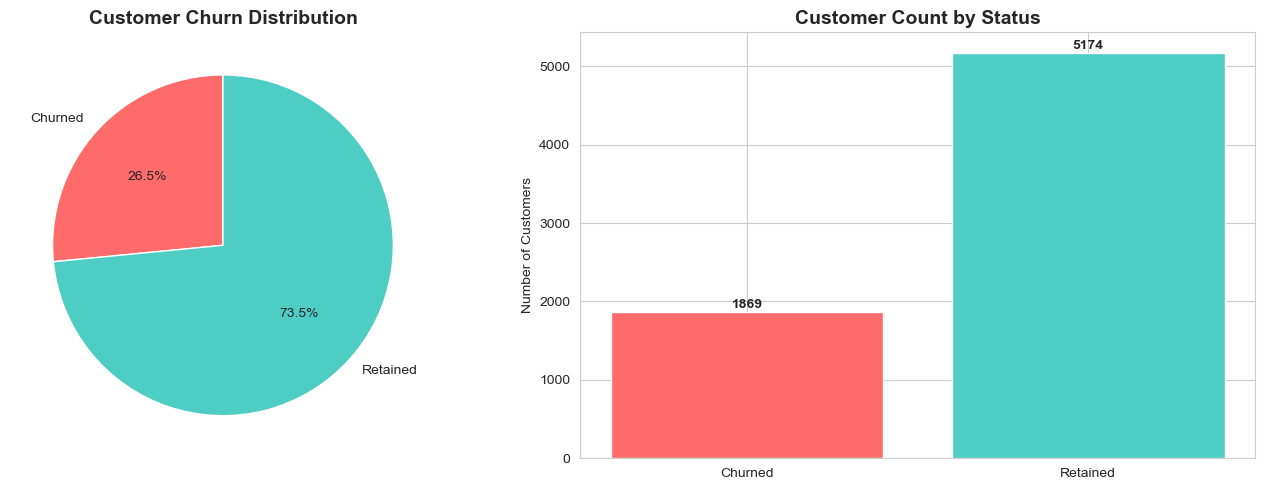

26.536987079369588

In [10]:
analyze_churn_rate(df_clean)

Analysing the churn rate by the number of months the customer has been in service


Churn rate by tenure group:
                  mean  count
TenureGroup                  
0-1 year     47.438243   2186
1-2 years    28.710938   1024
2-4 years    20.388959   1594
4+ years      9.513176   2239


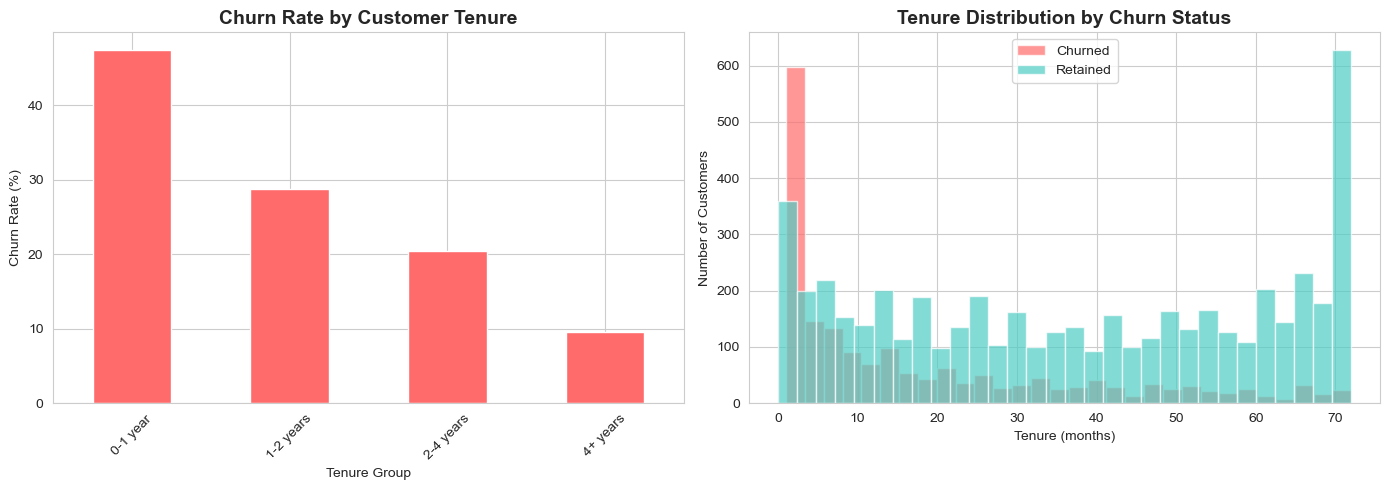

In [11]:
analyze_by_tenure(df_clean)

Analysing churn rate by the different charges group

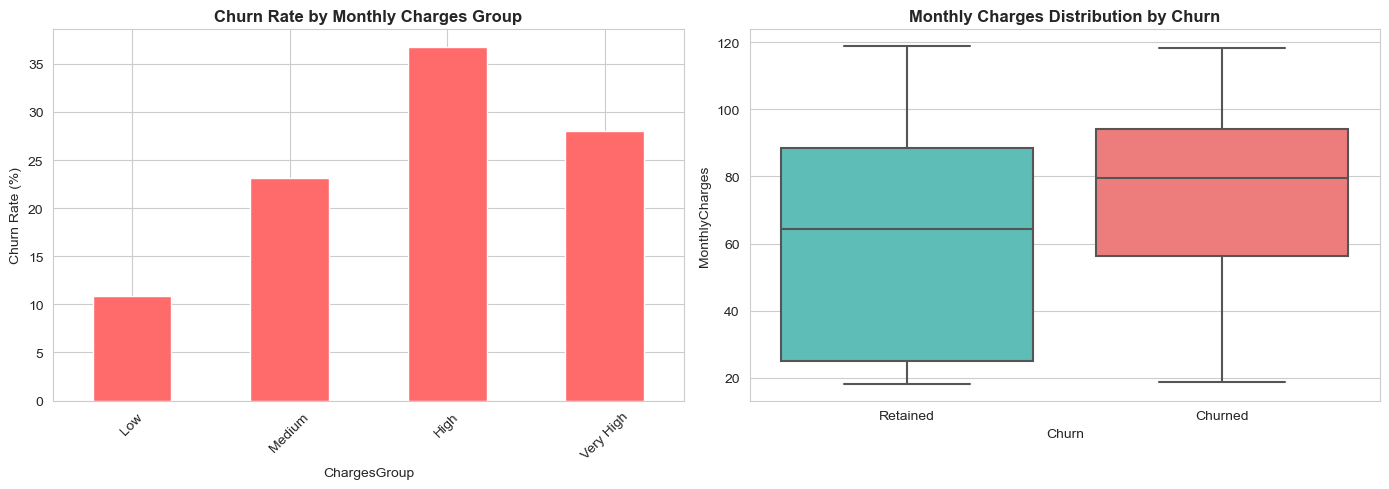

,mean,count
ChargesGroup,,
Low,10.893372,1735
Medium,23.136977,1409
High,36.736737,2997
Very High,28.048780,902


In [12]:
analyze_by_charges(df_clean)

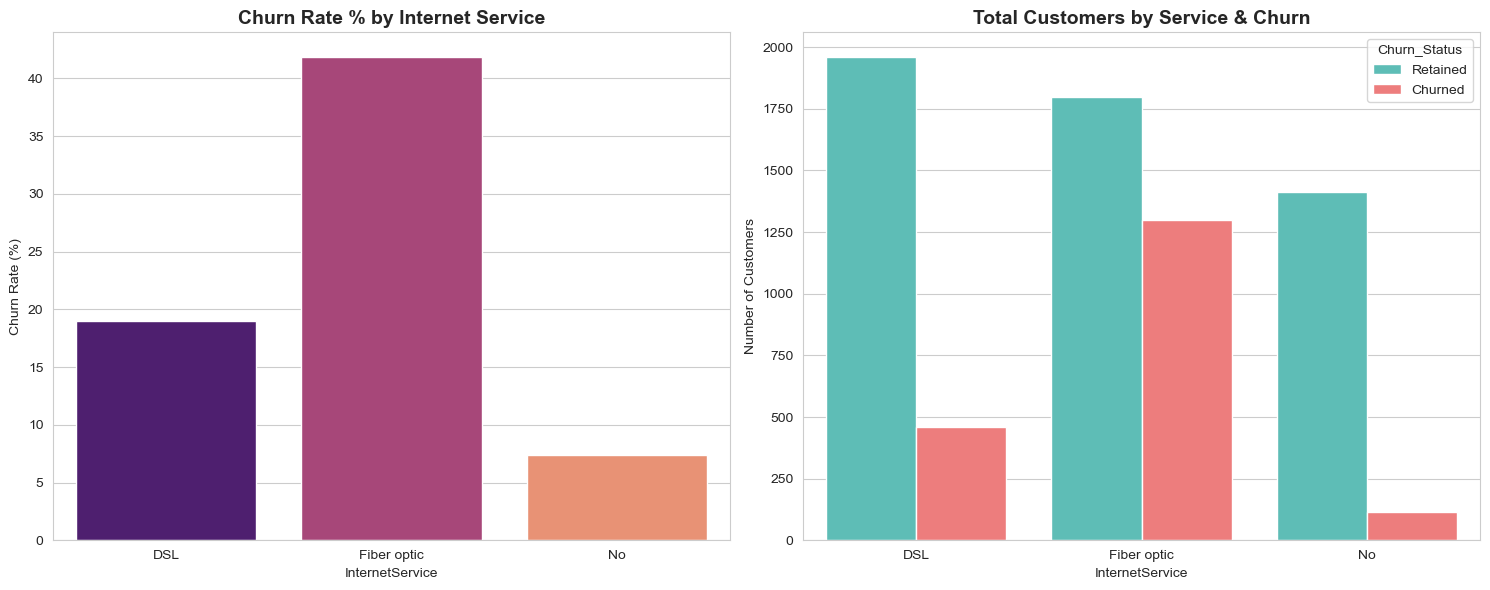

In [13]:
analyze_internet_churn(df_clean)

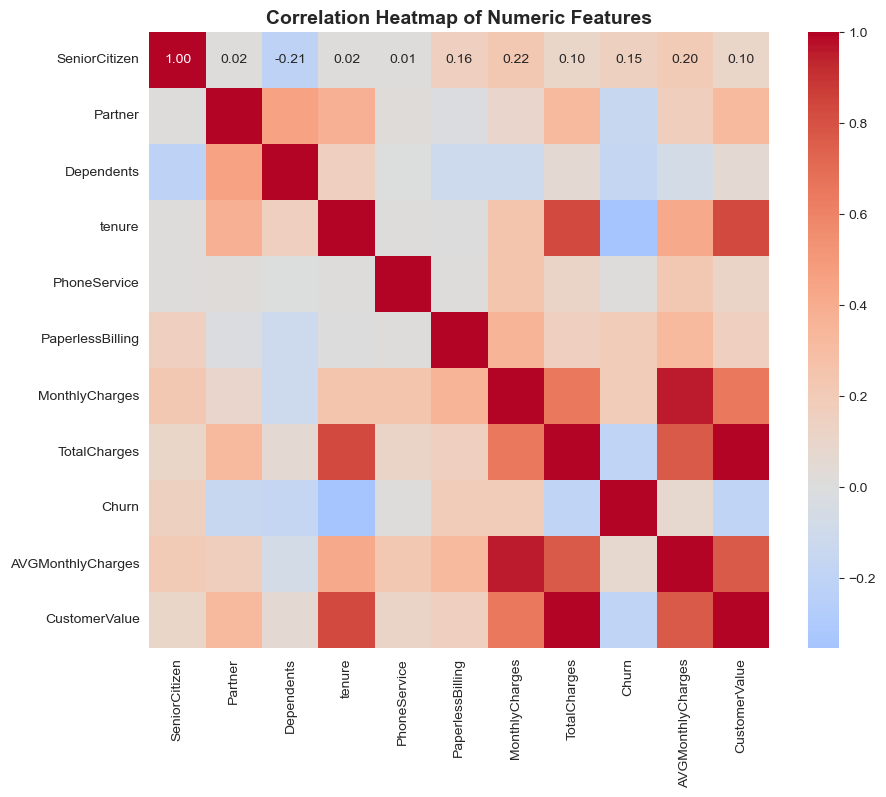

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,AVGMonthlyCharges,CustomerValue
SeniorCitizen,1.000000,0.016479,-0.211185,0.016567,0.008576,0.156530,0.220173,0.103006,0.150889,0.202294,0.103261
Partner,0.016479,1.000000,0.452676,0.379697,0.017706,-0.014877,0.096848,0.317504,-0.150448,0.167656,0.317462
Dependents,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.111377,-0.113890,0.062078,-0.164221,-0.069737,0.062290
tenure,0.016567,0.379697,0.159712,1.000000,0.008448,0.006152,0.247900,0.826178,-0.352229,0.414352,0.826568
PhoneService,0.008576,0.017706,-0.001762,0.008448,1.000000,0.016505,0.247398,0.113214,0.011942,0.221543,0.113336
PaperlessBilling,0.156530,-0.014877,-0.111377,0.006152,0.016505,1.000000,0.352150,0.158574,0.191825,0.316985,0.158843
MonthlyCharges,0.220173,0.096848,-0.113890,0.247900,0.247398,0.352150,1.000000,0.651174,0.193356,0.956003,0.651566
TotalCharges,0.103006,0.317504,0.062078,0.826178,0.113214,0.158574,0.651174,1.000000,-0.198324,0.764692,0.999561
Churn,0.150889,-0.150448,-0.164221,-0.352229,0.011942,0.191825,0.193356,-0.198324,1.000000,0.072579,-0.198514
AVGMonthlyCharges,0.202294,0.167656,-0.069737,0.414352,0.221543,0.316985,0.956003,0.764692,0.072579,1.000000,0.763581


In [14]:
plot_correlation_heatmap(df_clean)

**Executive Summary: Customer Churn Analysis**
The objective of this analysis was to identify the primary drivers of customer attrition (churn) and provide actionable strategies to improve retention. Our analysis of **7,043** customers revealed three critical "risk zones" where the company is losing the most revenue.

###  Key Findings & Risk Drivers

| Risk Factor | Observation | Business Impact |
| :--- | :--- | :--- |
| **Early Tenure** | A significant spike in churn occurs within the first 12 months. | High acquisition costs are not recovered before customers leave. |
| **Contract Type** | Month-to-Month users are significantly more likely to churn. | Lack of "stickiness" makes it too easy for customers to switch. |
| **High Billing** | Churners have higher Monthly Charges (median ~$80 vs ~$65). | High costs without perceived value are driving exits. |
| **Internet Type** | Fiber Optic customers exhibit the highest churn rates. | Fast speed is not enough to maintain loyalty; price is the issue. |